# == TAREFA: Transfer Learning indoorCVPR_09 ==

# Tarefa: Transferência de aprendizagem

Durante as aulas, nós usamos o modelo VGG16 para classificar ambientes internos das 5 categorias com maior número de imagens no dataset escolhido. Nesse exercício, tente adaptar a rede para classificar as 10 categorias seguintes (por número de imagens) contidas no dataset. Como o modelo desempenha tendo mais categorias e menos imagens para treinar?

## Etapa 1: Baixando e descompactando as imagens

In [1]:
!wget http://groups.csail.mit.edu/vision/LabelMe/NewImages/indoorCVPR_09.tar

--2021-03-02 21:58:09--  http://groups.csail.mit.edu/vision/LabelMe/NewImages/indoorCVPR_09.tar
Resolving groups.csail.mit.edu (groups.csail.mit.edu)... 128.30.2.44
Connecting to groups.csail.mit.edu (groups.csail.mit.edu)|128.30.2.44|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2592010240 (2.4G) [application/x-tar]
Saving to: ‘indoorCVPR_09.tar’

indoorCVPR_09.tar   100%[===================>]   2.41G  3.14MB/s    in 7m 43s  

2021-03-02 22:05:52 (5.34 MB/s) - ‘indoorCVPR_09.tar’ saved [2592010240/2592010240]



In [2]:
!tar -xvf indoorCVPR_09.tar

Streaming output truncated to the last 5000 lines.
Images/mall/cover_home3.jpg
Images/mall/CP67791.jpg
Images/mall/crocker_galleria_735089.jpg
Images/mall/mall1.jpg
Images/mall/d8.jpg
Images/mall/deira_city_centre_dubai_08.jpg
Images/mall/dungarv_new_mall.jpg
Images/mall/latham_circle_mall_16.jpg
Images/mall/eastridg1.jpg
Images/mall/IMG_6449.jpg
Images/mall/main_boutique_b.jpg
Images/mall/easyfranchise_centre_commercial_1.jpg
Images/mall/ins42.jpg
Images/mall/mall14.jpg
Images/mall/eaton_centre_2001_03.jpg
Images/mall/ins43.jpg
Images/mall/mall17.jpg
Images/mall/full_shopping_Central_1.jpg
Images/mall/galleria.jpg
Images/mall/galleria1.jpg
Images/mall/galleria2.jpg
Images/mall/Galleria_003.jpg
Images/mall/laurel_mall_06.jpg
Images/mall/Galleria_1.jpg
Images/mall/galleria_san_federico_nr_109_2_n1.jpg
Images/mall/ins23.jpg
Images/mall/ins44.jpg
Images/mall/mall18.jpg
Images/mall/galleria_vittorio_emanuele_ii_milan_mlgalar.jpg
Images/mall/ins45.jpg
Images/mall/mall19.jpg
Images/mall/GUM_

## Etapa 2: Preparando as pastas dos datasets

In [3]:
import os

n_files_folder = [len(files) for root, dir, files in os.walk('Images') if len(files) > 0]
folders = [dirs for root, dirs, files in os.walk('Images') if len(dirs) > 0][0]

n_files_folder[:5], folders[:5]

([346, 155, 107, 166, 513],
 ['corridor', 'stairscase', 'library', 'tv_studio', 'restaurant'])

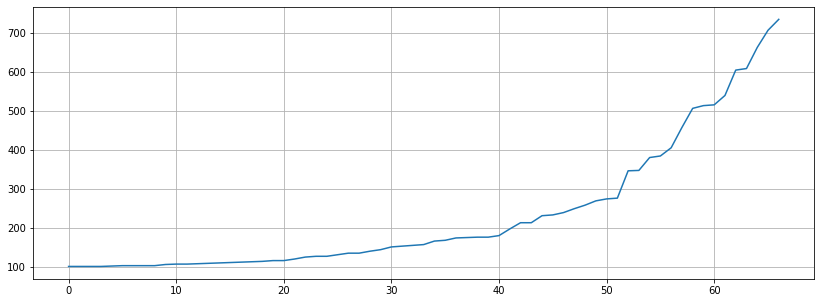

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(sorted(n_files_folder))
plt.grid();

In [9]:
import numpy as np

sum(np.array(n_files_folder) > 300), sum(np.array(n_files_folder) > 600)

(15, 5)

In [10]:
mask = [a & b for a, b in zip(np.array(n_files_folder) < 600, np.array(n_files_folder) > 300)]
keep_folders = list(np.array(folders)[mask])
keep_folders

['corridor',
 'restaurant',
 'inside_subway',
 'toystore',
 'subway',
 'pantry',
 'bookstore',
 'casino',
 'warehouse',
 'bakery']

In [11]:
import shutil
[shutil.rmtree('Images/' + folder) for folder in folders if folder not in keep_folders];

In [12]:
n_files_folder = [len(files) for root, dir, files in os.walk('Images') if len(files) > 0]
folders = [dirs for root, dirs, files in os.walk('Images') if len(dirs) > 0][0]
filenames = [os.listdir('Images/' + folder) for folder in folders]

n_files_folder, folders, filenames

([346, 513, 457, 347, 539, 384, 380, 515, 506, 405],
 ['corridor',
  'restaurant',
  'inside_subway',
  'toystore',
  'subway',
  'pantry',
  'bookstore',
  'casino',
  'warehouse',
  'bakery'],
 [['corridor_btwn_ctrms_2_3.jpg',
   'MW_Howard_St_Corridor_LOR.jpg',
   'corridora7.jpg',
   'Cafeteria.jpg',
   'Completed_corridor.jpg',
   'c4.jpg',
   'Main_Hallway.jpg',
   'upper_main_hallway_1_c.jpg',
   '5_1_02_Corridor_2.jpg',
   'corridor3.jpg',
   'c10.jpg',
   'corridor1.jpg',
   'corridor_1.jpg',
   'p1010062_c.jpg',
   '113_1313.jpg',
   'couloir_jour.jpg',
   'The_Corridor_completed.jpg',
   'Prof_corridor.jpg',
   'Rimi_Corridor.jpg',
   'interior_corridor2.jpg',
   'Main_Corridor16.jpg',
   'hallway.jpg',
   'IMG_9681.jpg',
   'n190094.jpg',
   'corridor34.jpg',
   'hall135.jpg',
   'corridor55.jpg',
   'N457068.jpg',
   'Hotel_aloj_pasillo_1_1024.jpg',
   'korridor.jpg',
   'corridora1.jpg',
   'corridor_sized.jpg',
   'IMG_0065.jpg',
   'hospital_corridor.jpg',
   'pasillo22

In [13]:
np.random.seed(23)
files_test = [sorted(np.random.choice(files, round(n_files * 0.2), replace=False)) for files, n_files in zip(filenames, n_files_folder)]
files_test

[['07_palace_corridor.jpg',
  '10_27_05_corridor.jpg',
  '110_bb_pasillo3_small_.jpg',
  '113_1313.jpg',
  '16_corridor.jpg',
  '1st_floor_hallway.jpg',
  'BBDO_Corridor_Principal.jpg',
  'Blue_Peach_Corridor.jpg',
  'CA_97_3_283_6_l.jpg',
  'Clean_Corridor.jpg',
  'Corridor33.jpg',
  'Corridor_3.jpg',
  'Corridor_City_Academy.jpg',
  'Corridor_Upstairs.jpg',
  'Corridor_gif.jpg',
  'Corridor_of_Sixth_Teaching_Building.jpg',
  'Couloir_vers_chambre.jpg',
  'Empty_Hospital_Corridor.jpg',
  'Main_Corridor.jpg',
  'N457068.jpg',
  'OR_04_04_0007_19_l.jpg',
  'PASILLO223.jpg',
  'Rimi_Corridor.jpg',
  'Serenity_Apropos_Corridor.jpg',
  'aa043606.jpg',
  'allee2yp.jpg',
  'c17.jpg',
  'c20.jpg',
  'c5.jpg',
  'c6.jpg',
  'c7.jpg',
  'coll_couloir.jpg',
  'corridor06.jpg',
  'corridor08.jpg',
  'corridor19.jpg',
  'corridor46.jpg',
  'corridor54.jpg',
  'corridor55.jpg',
  'corridor69.jpg',
  'corridor73.jpg',
  'corridor_2.jpg',
  'corridora4.jpg',
  'corridora7.jpg',
  'couloir_gite_norman

In [14]:
os.mkdir('Images/test/')
[os.mkdir('Images/test/' + folder) for folder in folders];
[shutil.move('Images/' + folder + '/' + file, 'Images/test/' + folder + '/' + file) for files, folder in zip(files_test, folders) for file in files];

In [15]:
os.mkdir('Images/train/')
[shutil.move('Images/' + folder, 'Images/train/' + folder) for folder in folders];

In [16]:
os.rename('Images','dataset')

## Inspeção das imagens

In [17]:
filenames = [os.listdir('dataset/train/' + folder) for folder in folders]
files_view = [sorted(np.random.choice(files, 4, replace = False)) for files in filenames]
files_view

[['PASILLO2.jpg', 'Resize_of_Corridor.jpg', 'n190094.jpg', 'p1010067_c.jpg'],
 ['RestauC_L.jpg',
  'restaurante_04_15_altavista.jpg',
  'restaurante_22_12_altavista.jpg',
  'room246.jpg'],
 ['inside_subway_0294.jpg',
  'inside_subway_0320.jpg',
  'inside_subway_0373.jpg',
  'inside_subway_0380.jpg'],
 ['Spielzeug_150_02_flickr.jpg',
  'a1_toystore2.jpg',
  'jugueteria_21_01_flickr.jpg',
  'speelgoed_78_15_flickr.jpg'],
 ['subway_0007.jpg', 'subway_0168.jpg', 'subway_0298.jpg', 'subway_0333.jpg'],
 ['pantry_140_08_flickr.jpg',
  'pantry_16_18_flickr.jpg',
  'pantry_24_19_flickr.jpg',
  'pantry_94_11_flickr.jpg'],
 ['Bookstore1_2.jpg',
  'Librairie_28_01_altavista.jpg',
  'Librairie_47_10_altavista.jpg',
  'bookstore_25_21_flickr.jpg'],
 ['casino_0071.jpg', 'casino_0112.jpg', 'casino_0168.jpg', 'casino_0305.jpg'],
 ['warehouse_0140.jpg',
  'warehouse_0199.jpg',
  'warehouse_0291.jpg',
  'warehouse_0458.jpg'],
 ['bakery_22_21_yahoo.jpg',
  'bakery_23_10_yahoo.jpg',
  'boulangerie_08_19_ya

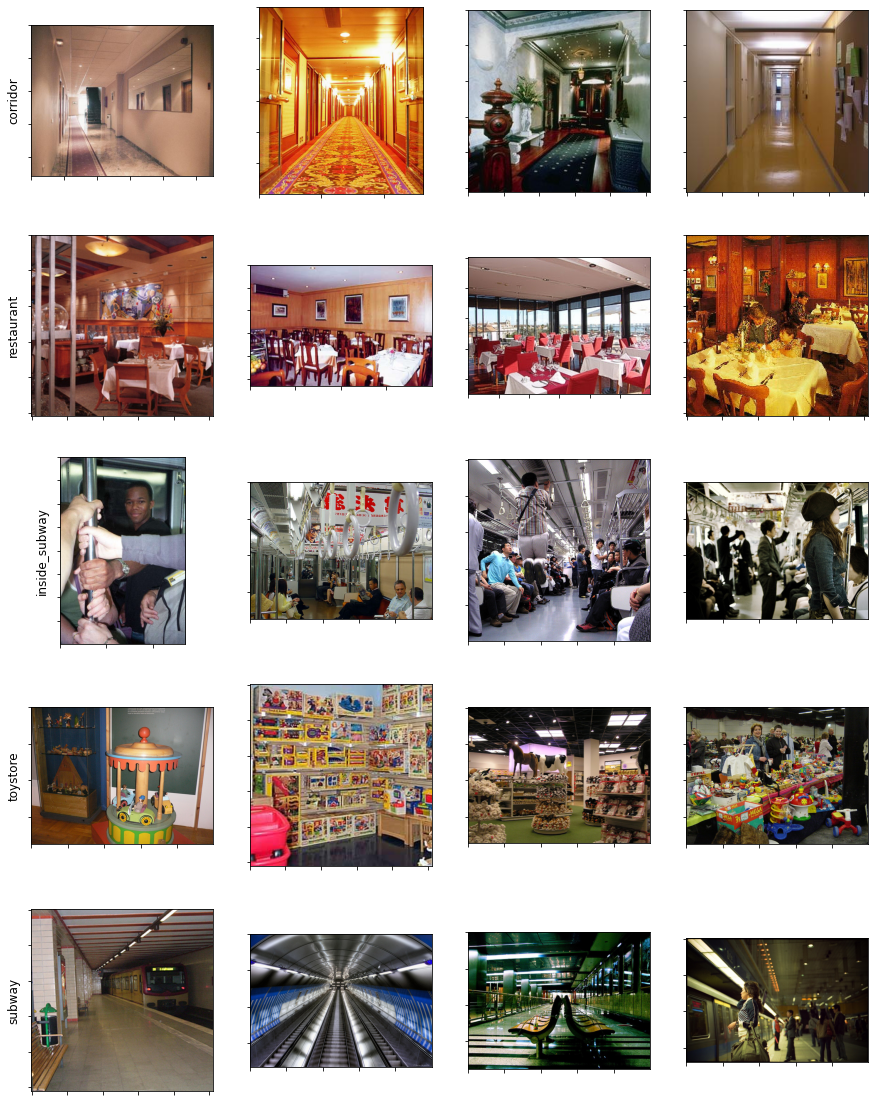

In [18]:
fig, ax = plt.subplots(5, 4, figsize = (15,20))
for row in range(5):
  category = folders[row]
  ax_row = ax[row]
  for column in range(4):
    img = plt.imread('dataset/train/' + category + '/' + files_view[row][column])
    ax_col = ax_row[column]
    ax_col.imshow(img)
    if column == 0:
      ax_col.set_ylabel(category, size = 'large')
    ax_col.set_xticklabels([])
    ax_col.set_yticklabels([])

## Etapa 4: Preparando os datasets para o uso no PyTorch

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
from torchvision import datasets, models
import torchvision.transforms as transforms
from datetime import datetime

In [20]:
torch.manual_seed(124)

In [21]:
path_train = 'dataset/train'
path_test = 'dataset/test'

transform = transforms.Compose([transforms.Resize([224,224]), transforms.ToTensor()])

In [22]:
train_dataset = datasets.ImageFolder(path_train, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = datasets.ImageFolder(path_test, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True)

## Etapa 5: Defindo o modelo e parâmetros de treinamento

In [23]:
model = models.vgg16(pretrained = True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


In [24]:
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [25]:
n_inputs = model.classifier[6].in_features
classification_layer = nn.Linear(n_inputs, len(train_dataset.classes))
model.classifier[6] = classification_layer

n_inputs, len(train_dataset.classes)

(4096, 10)

In [26]:
for param in model.features.parameters():
  param.requires_grad = False

In [27]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

## Etapa 6: Treinamento e validação

In [28]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [29]:
def train_loop(loader, epoch):

  run_loss = 0.
  run_acc = 0.

  for i, data in enumerate(loader):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    optimizer.zero_grad()
    outputs = model(inputs)

    loss = criterion(outputs, labels)
    loss.backward()

    optimizer.step()

    run_loss += loss.item()

    # Como `output` não passou por ativação, vamos fazer isso agora usando a função `F.softmax`.
    # Em seguida, usamos `torch.argmax` para retornar o índice mais alto, que corresponde à predição.
    predicted = torch.argmax(F.softmax(outputs, dim=1), dim = 1)

    # Agora podemos ver quantas predições o modelo acertou
    equals = predicted == labels

    # A precisão será igual à média da variável anterior (número de `True` dividido pelo total)
    acc = torch.mean(equals.float())
    run_acc += acc

    # Imprimindo os dados referentes a este loop
    print('\rÉpoca {:03d} | loop {:03d}/{:03d}: perda {:.5f} - precisão {:.5f}' \
          .format(epoch + 1, i + 1, len(loader), loss.item(), acc), end='\r')
    
  # Imprimindo os dados referentes a esta época

  print('>>>>> ÉPOCA {:03d} FINALIZADA: perda {:.5f} - precisão {:.5f}' \
        .format(epoch + 1, run_loss/len(loader), run_acc/len(loader)))

In [30]:
start = datetime.now()
for epoch in range(5):
  print('\nTREINAMENTO...')
  train_loop(train_loader, epoch)
  
  model.eval()
  print('\nVALIDANDO...')
  train_loop(test_loader, epoch)

  model.train()
end = datetime.now()

print('Treinamento/Validação demorou {}'.format(end - start))


TREINAMENTO...
>>>>> ÉPOCA 001 FINALIZADA: perda 1.19509 - precisão 0.63689

VALIDANDO...
>>>>> ÉPOCA 001 FINALIZADA: perda 0.64953 - precisão 0.78858

TREINAMENTO...
>>>>> ÉPOCA 002 FINALIZADA: perda 0.68272 - precisão 0.84058

VALIDANDO...
>>>>> ÉPOCA 002 FINALIZADA: perda 0.32193 - precisão 0.90816

TREINAMENTO...
>>>>> ÉPOCA 003 FINALIZADA: perda 0.50694 - precisão 0.88951

VALIDANDO...
>>>>> ÉPOCA 003 FINALIZADA: perda 0.16284 - precisão 0.95089

TREINAMENTO...
>>>>> ÉPOCA 004 FINALIZADA: perda 0.51755 - precisão 0.91018

VALIDANDO...
>>>>> ÉPOCA 004 FINALIZADA: perda 0.27033 - precisão 0.94276

TREINAMENTO...
>>>>> ÉPOCA 005 FINALIZADA: perda 0.64760 - precisão 0.91442

VALIDANDO...
>>>>> ÉPOCA 005 FINALIZADA: perda 0.36633 - precisão 0.94356
Treinamento/Validação demorou 0:05:02.512694


## Etapa 7: Verificação

In [31]:
images, labels = next(iter(test_loader))
model.eval()
predicted = model(images.to(device)).cpu()
predicted = torch.argmax(F.softmax(predicted, dim = 1), dim = 1)
predicted

tensor([6, 4, 8, 8, 9, 4, 4, 7, 3, 1, 1, 6, 9, 8, 5, 6, 5, 0, 9, 8, 9, 5, 4, 7,
        1, 3, 5, 4, 6, 2, 6, 7])

In [32]:
test_dataset.class_to_idx

{'bakery': 0,
 'bookstore': 1,
 'casino': 2,
 'corridor': 3,
 'inside_subway': 4,
 'pantry': 5,
 'restaurant': 6,
 'subway': 7,
 'toystore': 8,
 'warehouse': 9}

In [33]:
idx_class = {k:v for v, k in test_dataset.class_to_idx.items()}
idx_class

{0: 'bakery',
 1: 'bookstore',
 2: 'casino',
 3: 'corridor',
 4: 'inside_subway',
 5: 'pantry',
 6: 'restaurant',
 7: 'subway',
 8: 'toystore',
 9: 'warehouse'}

In [34]:
labels, predicted = labels.detach().numpy(), predicted.detach().numpy()

In [35]:
labels = [idx_class[label] for label in labels]
predicted = [ idx_class[label] for label in predicted]

labels, predicted

(['restaurant',
  'inside_subway',
  'toystore',
  'toystore',
  'warehouse',
  'inside_subway',
  'inside_subway',
  'subway',
  'corridor',
  'bookstore',
  'bookstore',
  'restaurant',
  'warehouse',
  'toystore',
  'pantry',
  'restaurant',
  'bookstore',
  'bakery',
  'warehouse',
  'toystore',
  'warehouse',
  'pantry',
  'inside_subway',
  'subway',
  'bookstore',
  'corridor',
  'pantry',
  'inside_subway',
  'restaurant',
  'casino',
  'restaurant',
  'subway'],
 ['restaurant',
  'inside_subway',
  'toystore',
  'toystore',
  'warehouse',
  'inside_subway',
  'inside_subway',
  'subway',
  'corridor',
  'bookstore',
  'bookstore',
  'restaurant',
  'warehouse',
  'toystore',
  'pantry',
  'restaurant',
  'pantry',
  'bakery',
  'warehouse',
  'toystore',
  'warehouse',
  'pantry',
  'inside_subway',
  'subway',
  'bookstore',
  'corridor',
  'pantry',
  'inside_subway',
  'restaurant',
  'casino',
  'restaurant',
  'subway'])

In [36]:
images.shape

torch.Size([32, 3, 224, 224])

In [37]:
images = images.permute(0, 2, 3, 1).numpy()

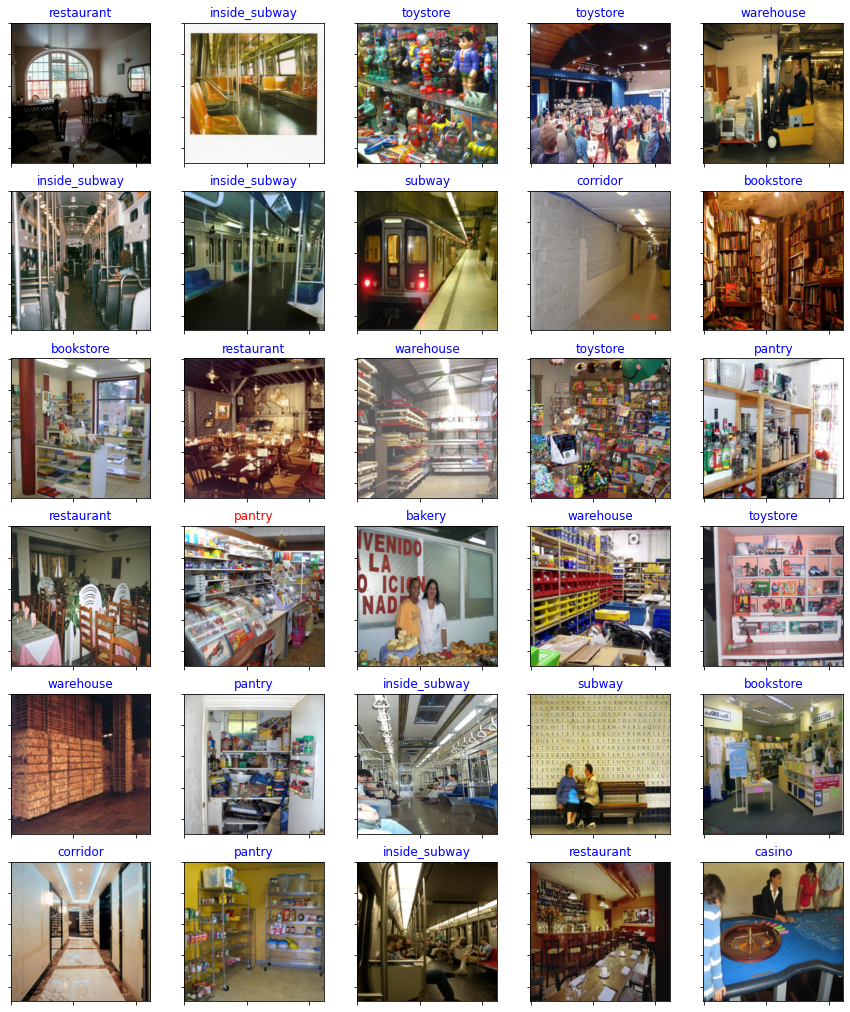

In [38]:
fig, ax = plt.subplots(6, 5, figsize=(15, 18))
i = 0
for row in range(6):
  ax_row = ax[row]
  for column in range(5):
    ax_col = ax_row[column]
    ax_col.imshow(images[i])
    ax_col.set_xticklabels([])
    ax_col.set_yticklabels([])
    col = 'blue' if labels[i] == predicted[i] else 'red'
    ax_col.set_title(predicted[i], color = col)
    i+=1